In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from PyFVCOM.read import MFileReader
from PyFVCOM.plot import Time

In [3]:
# Multiple output files can be loaded with MFileReader.
files = ['sample_april.nc', 'sample_may.nc', 'sample_june.nc']

# Positions we're interested in plotting. The find_nearest_point 
# function will find the closest node in the unstructured grid.
xy = np.array(((-4.5, 55), (-6.9, 52)))  # lon, lat pairs

# Extract only the surface layer for the plot.
dims = {'siglay': [0]}

# Our variables of interest.
varlist = ['temp']

fvcom = MFileReader(files, variables=varlist, dims=dims)

In [4]:
# Find the nodes in the grid closest to the positions we're interested in plotting.
indices = [fvcom.closest_node(i) for i in xy]

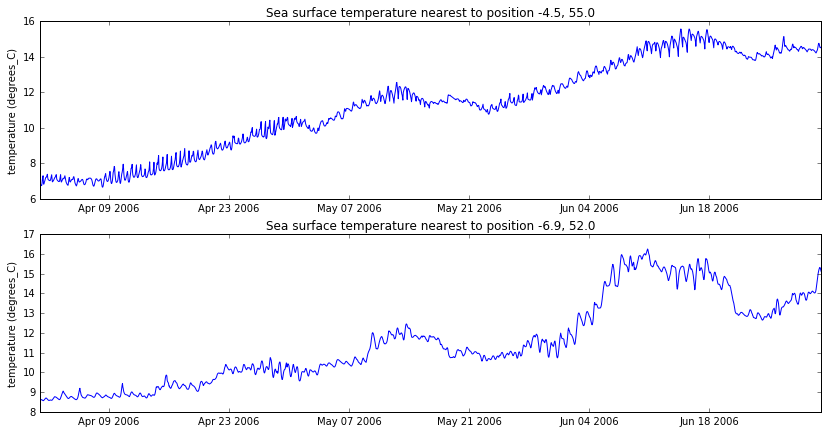

In [5]:
# Now plot the time series.
fig = plt.figure(figsize=(14, 7))  # size in inches
for c, ind in enumerate(indices):
    ax = fig.add_subplot(len(indices), 1, c + 1)
    time = Time(fvcom, figure=fig, axes=ax)
    time.plot_line(fvcom.data.temp[:, 0, ind])
    time.axes.set_title('Sea surface temperature nearest to position {}, {}'.format(*xy[c, :]))
    time.axes.set_ylabel('{} ({})'.format(fvcom.atts.temp.long_name, fvcom.atts.temp.units))